In [397]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline
pd.set_option('display.max_colwidth', None)

### 1. Gathering data

In [398]:
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [399]:
pet_supplies.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

> we have 150 null values for rating column

In [400]:
pet_supplies.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [401]:
pet_supplies.duplicated().sum()

0

In [402]:
pet_supplies.sample(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
248,249,Accessory,Bird,LARGE,42.97,1420.58,6.0,1
900,901,Food,Fish,Small,25.78,722.29,4.0,0
225,226,Medicine,Cat,small,25.16,989.87,4.0,1
793,794,Equipment,Cat,Small,27.76,1020.30,6.0,1
691,692,Toys,Fish,Small,unlisted,974.33,NaN,1
376,377,Equipment,Cat,MEDIUM,22.88,789.06,4.0,1
1103,1104,Toys,Fish,small,28.74,956.72,6.0,1
744,745,Food,Fish,LARGE,31,1020.52,6.0,1
1260,1261,Housing,Cat,medium,21.23,621.24,4.0,1
1452,1453,Equipment,Cat,small,28.09,1032.96,8.0,1


1. As general gathering of dataset we dint have duplication and missing values except of rating column
2. Different font size in size column
3. In the price column there float and int numbers and also the type of teh column is wrong (object)

### 2. Assesing data and cleaning

In [403]:
pet_supplies_clean = pet_supplies.copy()
#clean_loan.to_csv('clean_loan.csv', index=False)
pet_supplies_clean.sample(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1089,1090,Equipment,Dog,small,32.84,1107.49,3.0,0
1376,1377,Equipment,Cat,medium,unlisted,795.74,NaN,0
296,297,Toys,Bird,Medium,43.92,1525.97,6.0,1
592,593,Equipment,Cat,SMALL,27.94,1030.82,4.0,1
454,455,Accessory,Cat,MEDIUM,17.95,512.36,3.0,0
463,464,Medicine,Fish,Small,19.98,662.74,3.0,1
978,979,Housing,Bird,MEDIUM,36.08,959.73,6.0,1
415,416,Equipment,Cat,small,27.94,1035.28,3.0,1
169,170,Equipment,Cat,SMALL,28.17,1041.59,3.0,0
1186,1187,Medicine,Cat,medium,19.98,739.23,8.0,1


In [404]:
# drop duplicates in the dataset
pet_supplies_clean = pet_supplies_clean.drop_duplicates()

In [405]:
#verifying for duplicates
original_len= len(pet_supplies_clean)
if len(pet_supplies_clean) == original_len:
    print("No duplicates found")
else:
    print("Duplicate rows dropped")

No duplicates found


#### 1. check the wrong values for the 'category' column on the presence of non valuable meanings

In [406]:
print(pet_supplies_clean['category'].value_counts().sort_values(ascending=False), '\n')

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64 



* here we can see missing values in amount of 25. Replace them by 'Unknown'

In [407]:
# fill the '-' values of category with “Unknown”
pet_supplies_clean['category'] = pet_supplies_clean['category'].replace('-', 'Unknown')

In [408]:
#verifying for changed occupation
pet_supplies_clean.loc[pet_supplies_clean['category'].str.contains('Unknown'), ['category']].value_counts()

category
Unknown     25
dtype: int64

#### 2. Replace missing values with “Unknown” i the animal column

In [409]:
# check for missing values
if pet_supplies_clean['animal'].isnull().values.any():
    print("There are missing values in the 'animal' column.")
else:
    print("There are no missing values in the 'animal' column.")

There are no missing values in the 'animal' column.


In [410]:
print(pet_supplies_clean['animal'].value_counts().sort_values(ascending=False), '\n')

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64 



#### 3. Replace missing values with “Unknown” i the size column and make the same font size

In [411]:
print(pet_supplies_clean['size'].value_counts().sort_values(ascending=False), '\n')

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64 



In [412]:
# assuming pet_supplies_clean is the DataFrame and 'size' is the column to format
pet_supplies_clean['size'] = pet_supplies_clean['size'].str.capitalize()                                      

In [413]:
pet_supplies_clean.sample(3)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
589,590,Equipment,Fish,Small,23,704.78,4.0,1
1449,1450,Accessory,Fish,Small,17.94,443.36,5.0,0
1267,1268,Accessory,Bird,Large,43.06,1420.06,5.0,0


In [414]:
print(pet_supplies_clean['size'].value_counts().sort_values(ascending=False), '\n')

Small     754
Medium    492
Large     254
Name: size, dtype: int64 



#### 4. Replace missing values with the overall median price and make them all continuos (2 decimals)

In [415]:
# replace 'unlisted' with null and 0 with NaN
pet_supplies_clean['price'] = pet_supplies_clean['price'].replace(['unlisted', 0], [np.nan, np.nan])
pet_supplies_clean['price'] = pet_supplies_clean['price'].astype(float)

# calculate the median value of the 'price' column
median_price = pet_supplies_clean['price'].median()
print(median_price)

# replace NaN with the median value
pet_supplies_clean['price'].fillna(median_price, inplace=True)

28.064999999999998


In [416]:
# round the 'price' column to 2 decimals
pet_supplies_clean['price'] = pet_supplies_clean['price'].round(2)

In [417]:
pet_supplies_clean.price.value_counts()

28.06    156
22.98     13
28.00     10
27.99      8
28.03      8
        ... 
20.79      1
54.02      1
31.27      1
34.11      1
25.79      1
Name: price, Length: 706, dtype: int64

#### 5. Replace missing values with the overall median price and make them all continuos (2 decimals) i the sale column

In [419]:
# calculate the median value of the 'price' column
median_sales = pet_supplies_clean['sales'].median()
print(median_sales)

# replace NaN with the median value
pet_supplies_clean['sales'].fillna(median_sales, inplace=True)

1000.8299999999999


In [420]:
# round the 'price' column to 2 decimals
pet_supplies_clean['sales'] = pet_supplies_clean['sales'].round(2)

#### 6. Replace missing values with '0' in rating column

In [421]:
# replace NaN with the median value
pet_supplies_clean['rating'].fillna(0, inplace=True)

In [422]:
pet_supplies_clean.rating.value_counts()[0]

150

#### 7. Remove missing values in purchase column

In [423]:
pet_supplies_clean.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

* there is no missing values

# Visualization of data

In [430]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. State which category of the variable repeat purchases has the most observations

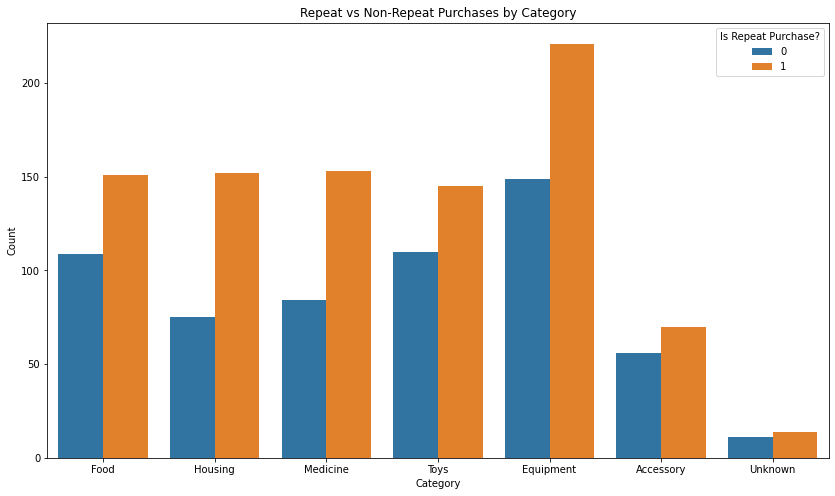

In [434]:
plt.figure(figsize=[14, 8])
# create a barplot that shows the number of repeat and non-repeat purchases for each category
sns.countplot(x='category', hue='repeat_purchase', data=pet_supplies_clean)

# add axis labels and a title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Repeat vs Non-Repeat Purchases by Category')
plt.legend(title='Is Repeat Purchase?', loc='upper right')

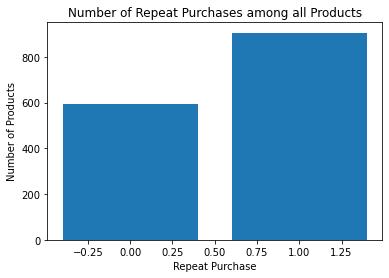

In [435]:
# Group the data by repeat_purchase and count the number of products
repeat_purchases = pet_supplies_clean.groupby('repeat_purchase')['product_id'].count()

# Create a bar chart to visualize the results
fig, ax = plt.subplots()
ax.bar(repeat_purchases.index, repeat_purchases.values)

# Add chart labels and title
ax.set_xlabel('Repeat Purchase')
ax.set_ylabel('Number of Products')
ax.set_title('Number of Repeat Purchases among all Products')

plt.show()


In [441]:

# Filter for purchases where the specific category was bought
category_purchases = pet_supplies_clean[pet_supplies_clean['category'] == 'Accessory']

# Filter for purchases where the same product was bought again (has a value of 1)
repurchased = category_purchases[category_purchases['repeat_purchase'] == 1]

# Count the number of times the category was purchased and subsequently repurchased
count = len(repurchased)

print(f"The category Accessory was repurchased {count} times.")


The category Accessory was repurchased 70 times.


a. The 'equipment' category of the variable repeat purchases has the most observations with 221 repeat purchases.

b. From looking at the data, it's clear that the observations are not evenly distributed across the categories of the variable repeat purchases. Some categories have a relatively balanced distribution of repeat purchases, while others have much lower counts. For instance, the 'accessory' category has only 70 repeat purchases, which is a lot lower than other categories. But 4 categories has almost similar range of repeated purchases among each other in the range 145-153. It shows that customers' repeat purchase behavior varies across categories and is not evenly distributed.

#### 2. Describtion the distribution of all of the sales

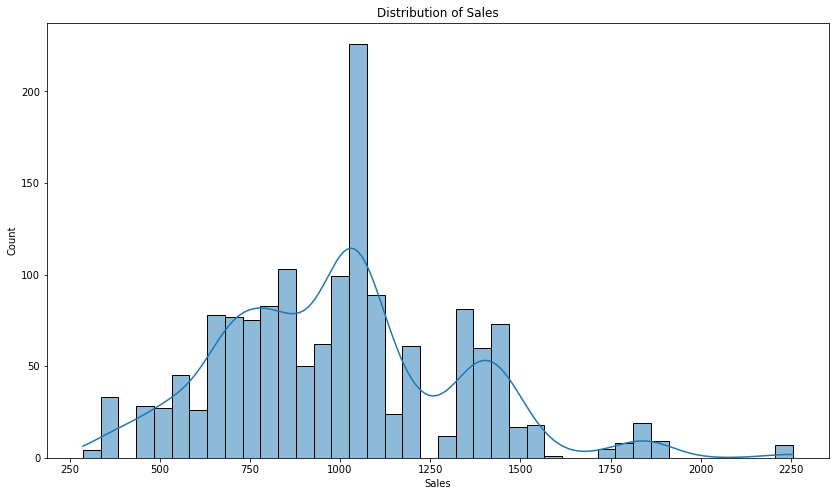

In [451]:
plt.figure(figsize=[14, 8])
# create a combined histogram and KDE plot
sns.histplot(data=pet_supplies_clean, x='sales', kde=True, bins=40)

# add labels and title
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')

# display the plot
plt.show()


* The majority of sales in the dataset are concentrated between 1000 and 1100. This suggests that most products in the pet supplies category are priced around this range, and that customers are more likely to purchase products that fall within this price range.
* There is one product with a very high sales value of 2250, which is an outlier compared to the rest of the products in the dataset. This suggests that there is one product in the pet supplies category that is particularly popular among customers and generates a very high amount of revenue for the business.
* The right-skewed nature of the distribution indicates that there are more products with lower sales values than there are with higher sales values. This suggests that while there are some products that generate a lot of revenue, the majority of products in the pet supplies category have lower sales values.

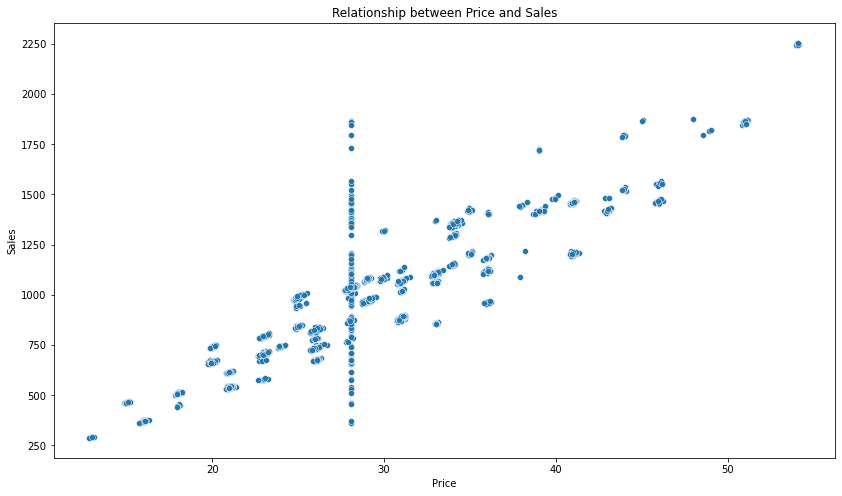

In [455]:
plt.figure(figsize=[14, 8])

sns.scatterplot(x="price", y="sales", data=pet_supplies_clean)
plt.title("Relationship between Price and Sales")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()


* The scatter plot shows a positive correlation between price and sales, it suggests that as the price of a product increases, the sales of that product also tend to increase. This could be interpreted as customers being willing to pay more for higher quality or more desirable products, or that the price of a product can influence customer perception of its value. 


#### 4. the relationship between repeat purchases and sales

Correlation between Repeat Purchases and Sales: -0.079


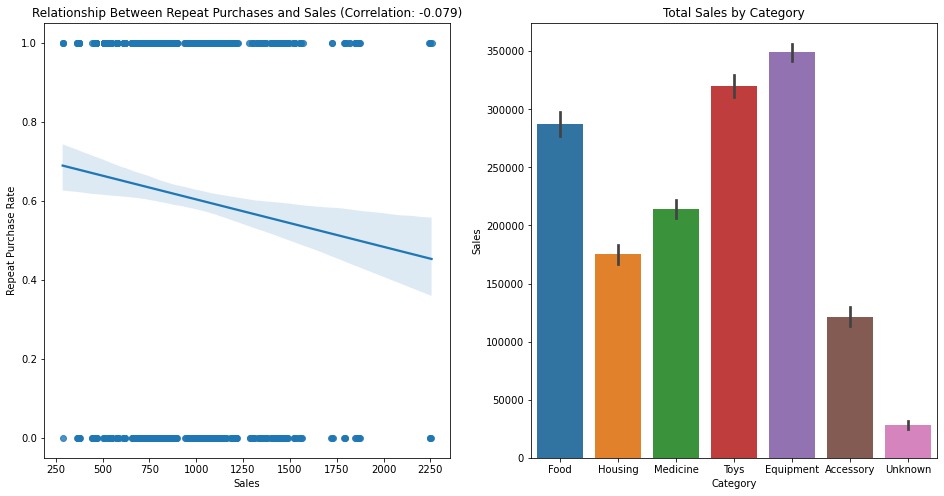

In [476]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between repeat purchases and sales
corr, _ = pearsonr(pet_supplies_clean['sales'], pet_supplies_clean['repeat_purchase'])
print('Correlation between Repeat Purchases and Sales: %.3f' % corr)

# Create the scatter plot with a regression line
fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
sns.regplot(x='sales', y='repeat_purchase', data=pet_supplies_clean, ax=axs[0])
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Repeat Purchase Rate')
axs[0].set_title('Relationship Between Repeat Purchases and Sales (Correlation: %.3f)' % corr)

# Create the bar plot of total sales by category
sns.barplot(x="category", y="sales", data=pet_supplies_clean, estimator=sum, ax=axs[1])
axs[1].set_title("Total Sales by Category")
axs[1].set_xlabel("Category")
axs[1].set_ylabel("Sales")

plt.show()


* In conclusion, a negative correlation between sales and repeat purchases may be explained by the fact that customers who make larger initial purchases may not need to buy more pet supplies for some time, and therefore may not be as likely to make repeat purchases. On the other hand, customers who make smaller initial purchases may need to replenish their pet supplies more frequently, leading to more repeat purchases over time.
* It seems that customers are more interested in buying equipment and toys compared to accessories and items in the unknown category. One possible conclusion that can be made is that the equipment and toys category is more popular and profitable than the accessory and unknown categories. Furthermore, including fact that customers tend to buy repeatedly in the equipment and toys category suggests that these items may have a higher level of customer satisfaction and loyalty. The business may want to prioritize maintaining the quality and variety of their offerings in this category. From the other side the low sales and repetition rates for the accessory and unknown categories may indicate that there is less demand or interest in these items.

In [478]:
# Save cleaned data locally
pet_supplies_clean.to_csv('./pet_supplies_clean.csv')

TypeError: can only insert Interval objects and NA into an IntervalArray